## Global Model Agnostic AI Model Explanation: Permutation Feature Improtance


In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


In [2]:
pip install scikit-learn==1.1

     |████████████████████████████████| 8.6 MB 319 kB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


In [24]:
random_state = 42

# Load the Diabetes dataset
diabetes_data = load_diabetes(scaled=False)
X = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
y = diabetes_data.target

# binarizing the target
y = y>=np.median(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random_state)

In [25]:
# Create and fit the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=random_state)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [26]:
# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

print(f'Classifier Accuracy: {acc}')

#classifyer accuracy: the total number of correct predictions divided by the. total number of predictions made for a dataset.

Classifier Accuracy: 0.7285067873303167


In [27]:

# Calculate permutation importances
result = permutation_importance(model, X_test, y_test, n_repeats=25, random_state=random_state)

# Create a DataFrame to store the permutation importances with their corresponding feature names
importances_df = pd.DataFrame({'Feature': diabetes_data.feature_names, 'Importance': result.importances_mean,
                               'std': result.importances_std})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.reindex(importances_df['Importance'].abs().sort_values(ascending=False).index)

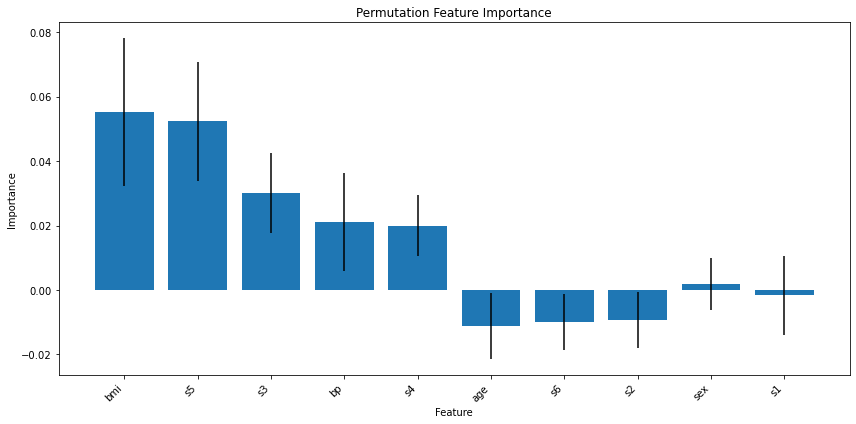

In [28]:

# Create the second subplot for Permutation Importances bar plot, test score 0.5
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.bar(importances_df['Feature'], importances_df['Importance'], yerr=importances_df['std'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()


**Exercise 8:** Increase the size of the test set to 0.5, and repeat the analysis. Is the results different? Which one is more reliable?

**Exercise 9:** What is the interpretation of nagative importance? Why do they happen? Discuss.

**Exercise 10:** Try the same method with Gradient Boosting Classifier and explain the similarities and differences in results. 

In [9]:
#Permutation feature importance is a model inspection technique that measures the contribution of each feature to a 
#fitted model’s statistical performance on a given tabular dataset. 
#This technique is particularly useful for non-linear or opaque estimators, and involves randomly shuffling the 
#values of a single feature and observing the resulting degradation of the model’s score [1].
#By breaking the relationship between the feature and the target, we determine how much the model relies on such 
#particular feature.


In [ ]:
Exercise 8: Increase the size of the test set to 0.5, and repeat the analysis. Is the results different? 
Which one is more reliable?
#First s5 0.055, bmi 0.051,s3 0.028, s2 -0.022, s1 -0.017 ,age -0.0015, s4 0.017, sex 0.01, , bp 0.008, s6 0.002
# Classifier Accuracy: 0.7477477477477478
# After changing the test set o 0.5 results changed: bmi= 0.054, s5= 0.052, s3= 0.029, bp=0.019, s4=0.017, age=-0.09, 
s6=-0.07, s2=-0.06, sex=0.002, s1=-0.002
# Classifier Accuracy: 0.7285067873303167

When the test set size was increased to 0.5, the results changed. The classifier accuracy dropped from 0.7477 to 0.7285.

Initially: s5 = 0.055, bmi = 0.051, s3 = 0.028, s2 = -0.022, s1 = -0.017, age = -0.0015, s4 = 0.017, sex = 0.01, 
bp = 0.008, s6 = 0.002
After change: bmi = 0.054, s5 = 0.052, s3 = 0.029, bp = 0.019, s4 = 0.017, age = -0.09, s6 = -0.07, s2 = -0.06, 
sex = 0.002, s1 = -0.002

This slight drop in accuracy shows that the model's performance isn't as strong with a larger test set. 
However, using a test set of 0.5 can give a better idea of how the model will perform on new, 
unseen data because more data is being tested. 
At the same time, using a bigger test set means less data is available for training, 
which can limit the model's ability to learn from the data, as seen with the small drop in accuracy.



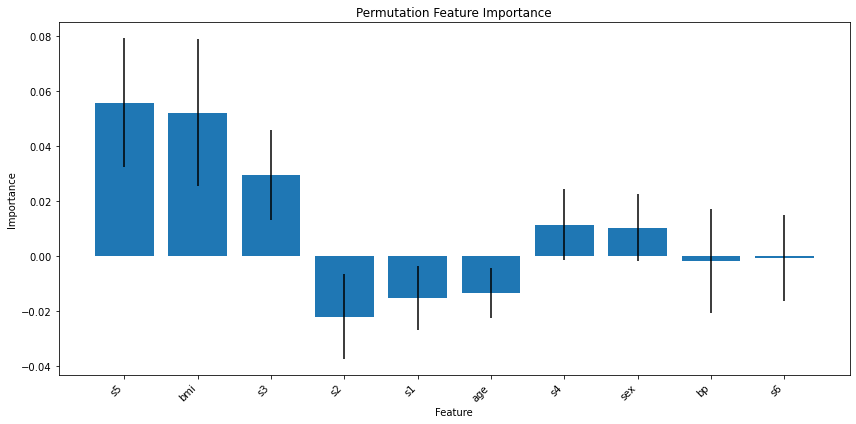

In [22]:
# Create the second subplot for Permutation Importances bar plot test score: 0.25
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.bar(importances_df['Feature'], importances_df['Importance'], yerr=importances_df['std'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()


In [ ]:
Exercise 9: What is the interpretation of nagative importance? Why do they happen? Discuss.
Negative permutation importance happens when a model's predictions improve after shuffling or making the values 
of a feature noisy. 
This suggests that the model is dependent on that feature in a way that reduces performance, implying that it 
would perform better without it.

When characteristics of negative relevance such as s2, s1, and age were shuffled, 
the model's predictions were more accurate than when they were left unchanged. 
This can occur when the model wrongly assumes that these traits are valuable, 
when in fact they may introduce noise or false information.


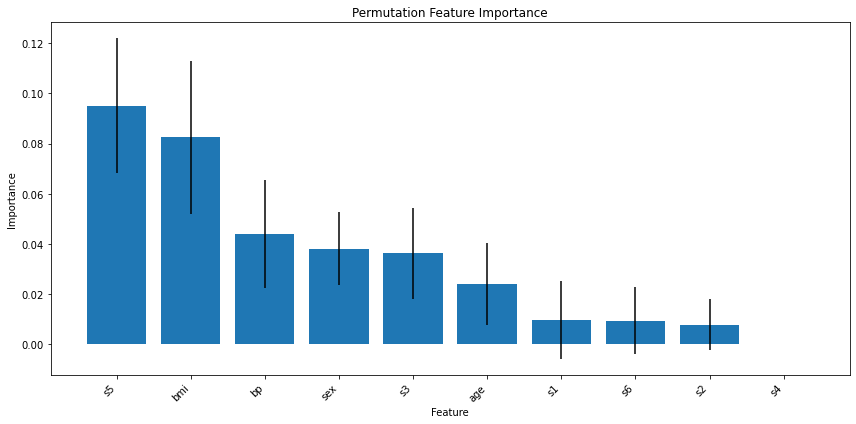

In [15]:

# Create the second subplot for Permutation Importances bar plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.bar(importances_df['Feature'], importances_df['Importance'], yerr=importances_df['std'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()
